# Ejercicio 14

Con el df llamado ’danish’ (datos de incendios en Dinamarca mayores de 1 DKK entre 1980 a 1990 en millones de coronas danesas) y para los importes de los siniestros entre los 1 DKK y 6 DKK, se pide:
* Realizar el histograma y ajuste a una distribución exponencial.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

danish = pd.read_csv('danish.csv')
datos = danish[danish.x < 6].copy()
datos = pd.Series(datos.x)

print(danish.x.count())
print(datos.count())

2167
1981


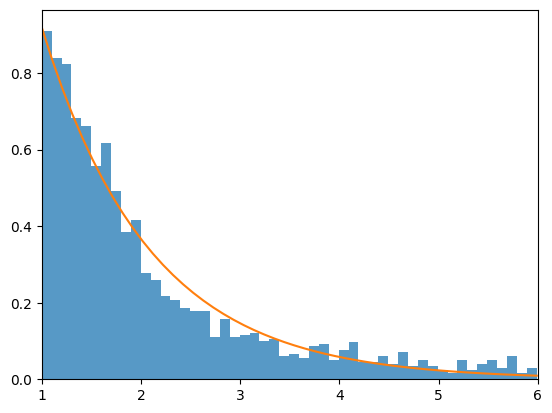

In [2]:
loc, scale = st.expon.fit(datos)
exponencial = st.expon(loc=loc, scale=scale)

plt.hist(datos, bins=50,  density=True, alpha=0.75)

x = np.linspace(datos.min(), datos.max(), 50)
y = st.expon.pdf(x, loc=loc, scale=scale)
plt.plot(x, y)
plt.xlim(1,6)
plt.show()

* Calcular la bondad del ajuste basado en el test de Kolmogorov-Smirnov:

In [3]:
kstest = st.kstest(datos, cdf='expon', args=(loc, scale))
print(kstest)

KstestResult(statistic=0.03999396941805089, pvalue=0.0034397408593530646, statistic_location=1.78899082568807, statistic_sign=1)


* Realizar la gráfica QQ-Plot frente a una distribución exponencial.

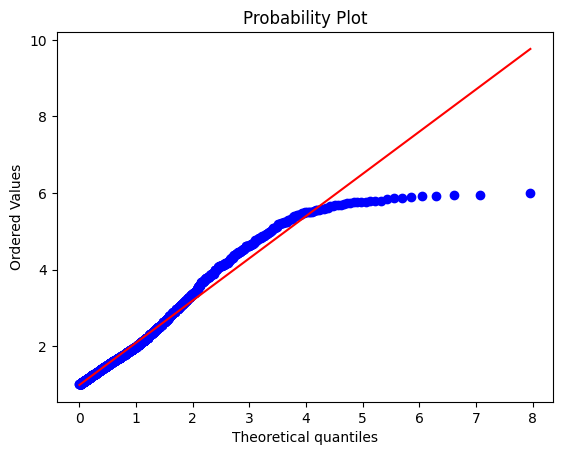

In [4]:
st.probplot(datos, dist=st.expon, plot=plt)
plt.show()

## :-(